Get data

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

--2024-10-09 15:22:39--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: 'laptops.csv'

     0K .......... .......... .......... .......... .......... 17% 3.20M 0s
    50K .......... .......... .......... .......... .......... 34% 40.7M 0s
   100K .......... .......... .......... .......... .......... 51% 34.8M 0s
   150K .......... .......... .......... .......... .......... 68% 19.9M 0s
   200K .......... .......... .......... .......... .......... 85% 11.8M 0s
   250K .......... .......... .......... .......... .         100% 27.9M=0.03s

2024-10-09 15:22:39 (11.0 MB/s) - 'laptops.csv' saved [298573/298573]



In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('laptops.csv')

In [5]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [10]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [12]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [13]:
df_data = df[['ram', 'storage', 'screen', 'final_price']]

In [18]:
for col in df_data:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

screen
[15.6 17.3 14.  16.1 13.3]
29

final_price
[1009.    299.    789.   1199.    669.01]
1440



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

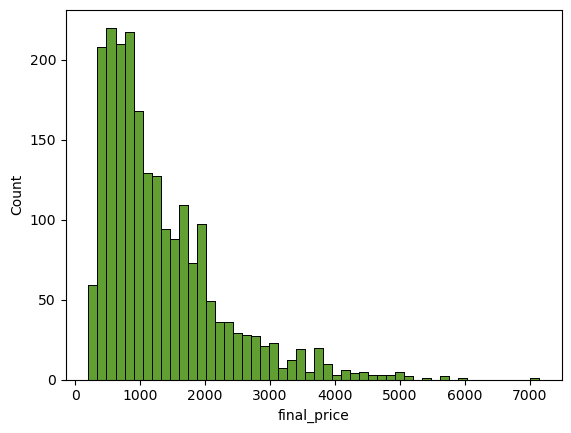

In [22]:
sns.histplot(df_data.final_price, bins=50)
plt.show()

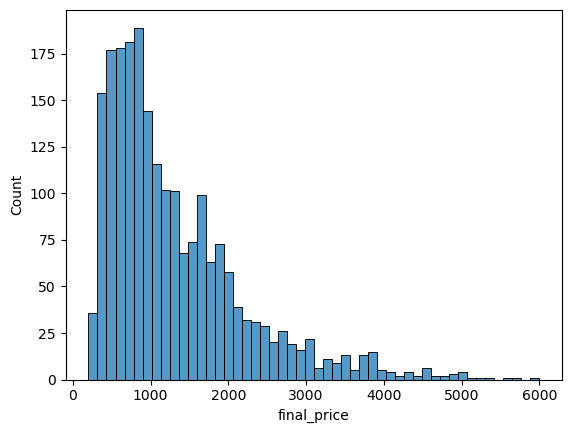

In [27]:
sns.histplot(df_data.final_price[df.final_price < 7000], bins=50)
plt.show()

In [28]:
df_data.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

Question 1

There's one column with missing values. What is it?

Ans : screen


In [30]:
df_data.ram.describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

Question 2

What's the median (50% percentile) for variable 'ram'?

Answer : 16

In [48]:
n = len(df_data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [49]:
n_val, n_test, n_train

(432, 432, 1296)

In [50]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [51]:
idx

array([2079,  668, 2073, ..., 1130, 1294,  860])

In [52]:
df_train = df_data.iloc[idx[:n_train]]
df_val = df_data.iloc[idx[n_train:n_train+n_val]]
df_test = df_data.iloc[idx[n_train+n_val:]]

In [53]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [57]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train["final_price"]
del df_val["final_price"]
del df_test["final_price"]

In [58]:
df_val

,ram,storage,screen
0,32,1000,16.0
1,16,512,15.6
2,12,512,15.6
3,8,256,13.6
4,8,512,15.6
...,...,...,...
427,8,128,13.0
428,8,256,13.3
429,8,512,14.0
430,16,512,14.0


We have two options: fill it with 0 or with the mean of this variable.

In [59]:
mean_screen = df_train.screen.mean()
mean_screen

15.163534416086618

In [60]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XT = X.transpose()

    XTX = XT.dot(X)
    print(np.linalg.det(XTX))
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [61]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [62]:
# fill missing values in `screen` with the median value
X_train_mean = df_train.fillna(mean_screen).values
X_val_mean = df_val.fillna(mean_screen).values
X_test_mean = df_test.fillna(mean_screen).values

In [63]:
# fill missing values in `screen` with 0
X_train_zero = df_train.fillna(0).values
X_val_zero = df_val.fillna(0).values
X_test_zero = df_test.fillna(0).values

In [65]:
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

2.383912449233421e+19


In [66]:
w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
y_pred_zero = w0_zero + X_val_mean.dot(w_zero)

3.3680198961398907e+19


In [67]:
rmse(y_val, y_pred_mean).round(2)

600.27

In [68]:
rmse(y_val, y_pred_zero).round(2)

599.53